#### Tristan Jones, Susan Aryal
#### PS:1486089, 1899326
#### Group 22
#### Group Project Classification: Part 1

# Preprocessing

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split



In [2]:
address = 'C:/Users/Tristan/Desktop/Data Science 3337/Projects/Project 2/Heart-Failure-Classification/heart_failure.csv'
df = pd.read_csv(address)
df = df.drop(['time'], axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


### Feature Types-
* Categorical:
    * Anaemia
    *    Diabetes
    *    High Blood Pressure
    *    Sex
    *    Smoking
* Continuous:
    *    Age
    *    Creatinine Phosphokinase
    *    Ejection Fraction
    *    Platelets
    *    Serum Creatinine
    *    Serum sodium
* Note: Time variable does not have any impact on Death event so it was dropped

## Categorical Information
#### Sex: Female = 0, Male = 1
#### Diabetes: Non-Diabetic = 0, Diabetic = 1
#### Anaemia: Non-Anaemic = 0, Anaemic =  1
#### High_blood_pressure: No = 0, Yes = 1
#### Smoking: Non-Smoker = 0, Smoker = 1
#### DEATH_EVENT: Non-Death 0, Death = 1

# Data Cleaning

## Checking and storing column names

In [3]:
col_names = df.columns.values
print(col_names)

['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'DEATH_EVENT']


## Checking datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


## Checking for missing values 

In [5]:
df.isna().head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

#### There are no missing values found in the dataset


## Creating Train and Test set

In [7]:
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## Counting Bins

In [8]:
np.bincount(y)

array([203,  96], dtype=int64)

In [9]:
np.bincount(y_train)

array([150,  59], dtype=int64)

In [10]:
np.bincount(y_test)

array([53, 37], dtype=int64)

# Descriptive Statistics

In [11]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


## Interpretation from the statistics:
#### Average age in the data set is around 61 years old with the youngest being 40 and the oldest being 95.
#### The standard deviation of the age is 11.89.
#### Average creatinine phosphokinase is around 582 ranging from 23 to 7861.
#### Average ejection factor is found to be around 38 which can go as much as 80 or as low as 14.
#### The average of serum creatinine level and serum sodium is 1.39 and 136.63 respectively.

## Calculating the correlation of each categorical features with the Death Event

In [12]:
print("Death and male correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["sex"] == 1].value_counts(normalize = True)[1]*100))
print("Death and female correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["sex"] == 0].value_counts(normalize = True)[1]*100))

Death and male correlation percentage: 31.96%
Death and female correlation percentage: 32.38%


In [13]:
print("Death and smoker correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["smoking"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-smoker correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["smoking"] == 0].value_counts(normalize = True)[1]*100))

Death and smoker correlation percentage: 31.25%
Death and non-smoker correlation percentage: 32.51%


In [14]:
print("Death and diabetic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["diabetes"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-diabetic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["diabetes"] == 0].value_counts(normalize = True)[1]*100))

Death and diabetic correlation percentage: 32.00%
Death and non-diabetic correlation percentage: 32.18%


In [15]:
print("Death and anaemic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["anaemia"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-anaemic correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["anaemia"] == 0].value_counts(normalize = True)[1]*100))

Death and anaemic correlation percentage: 35.66%
Death and non-anaemic correlation percentage: 29.41%


In [16]:
print("Death and high blood pressure correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["high_blood_pressure"] == 1].value_counts(normalize = True)[1]*100))
print("Death and non-high blood pressure correlation percentage: {0:.2f}%".format(df["DEATH_EVENT"][df["high_blood_pressure"] == 0].value_counts(normalize = True)[1]*100))

Death and high blood pressure correlation percentage: 37.14%
Death and non-high blood pressure correlation percentage: 29.38%


## Findings from the correlation calculation:
#### There is high correlation percentage in dead patients that were Aneamic and have high blood pressure.
#### Female have a slightly higher death rate than males.
#### Although odd, non-smokers have a slightly higher death rate than smokers. 
#### The diabetic and non-diabietic ones tend to have almost same death rates. 

# Feature vs Death
### Comparing each feature with our label: Death Event and visualizing the statistics.

## Age vs Death

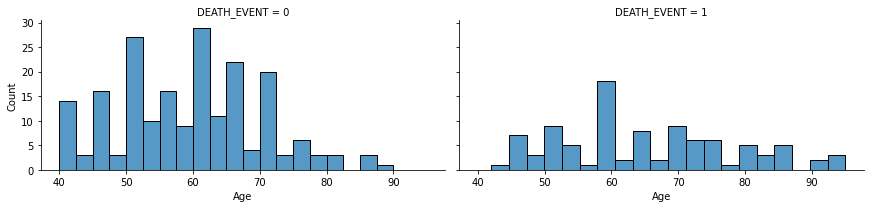

In [17]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'age', bins = 20)
g.set_axis_labels("Age", "Count")


#### Among the dead ones, the number of people dead is significantly large for age around 60 compared to other age groups.

## Anemia vs Death

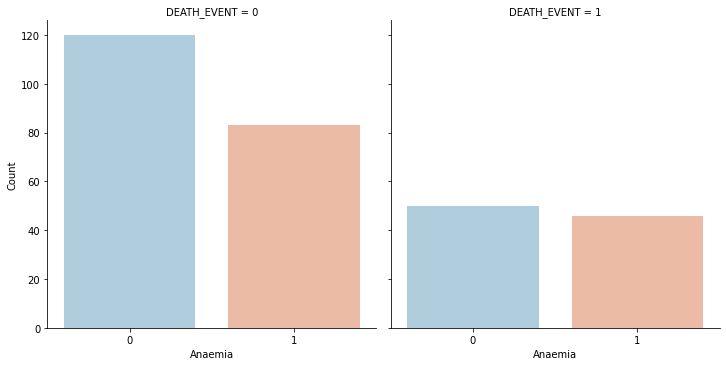

In [18]:
g = sns.catplot(x="anaemia", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Anaemia", "Count")

#### There is not much difference in the number of anemic and non-anemic people who are dead.

## Creatinine Phosphokinase vs Death

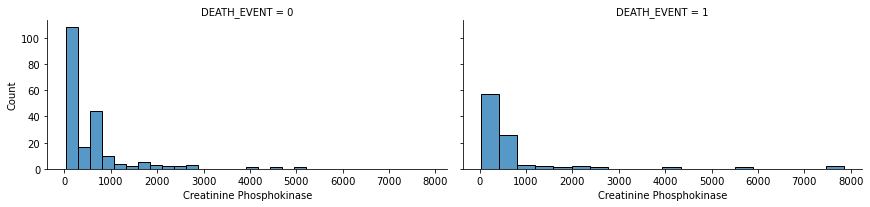

In [19]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'creatinine_phosphokinase', bins = 20)
g.set_axis_labels("Creatinine Phosphokinase", "Count")

#### Almost all poeple had the creatinine phosphokinase level ranging from 0 to 1000 while the maximum value is 7861 which suggests us we have some outliers. The minimum value is 23 and the standard deviation is 970.29.

## Diabetes  vs Death

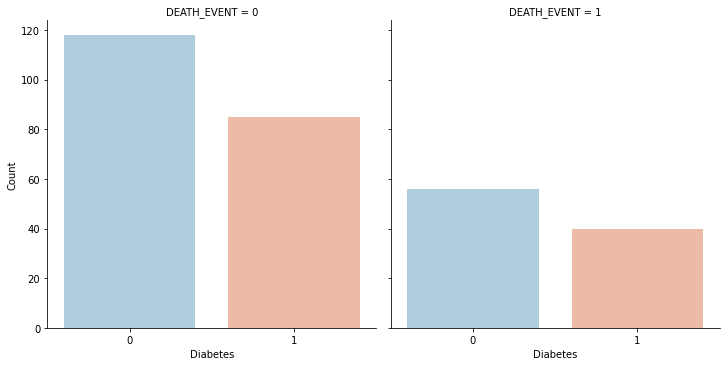

In [20]:
g = sns.catplot(x="diabetes", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Diabetes", "Count")

#### The diabetic and non-diabietic ones tend to have almost same death rates but our sample (dataset) has slightly more non-diabetic people than diabetic ones.

## Ejection Fraction vs Death

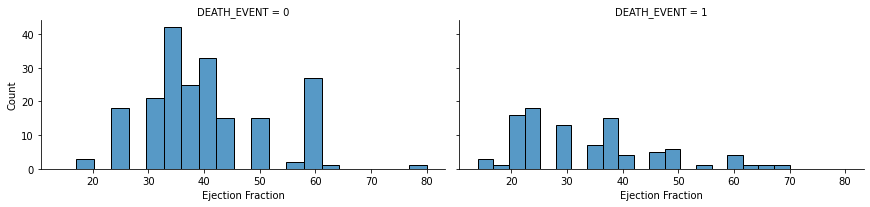

In [21]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'ejection_fraction', bins = 20)
g.set_axis_labels("Ejection Fraction", "Count")

#### The lower ejection factor resulted in death event while the non-dead ones have higher ejection factor.

## High Blood Pressure vs Death

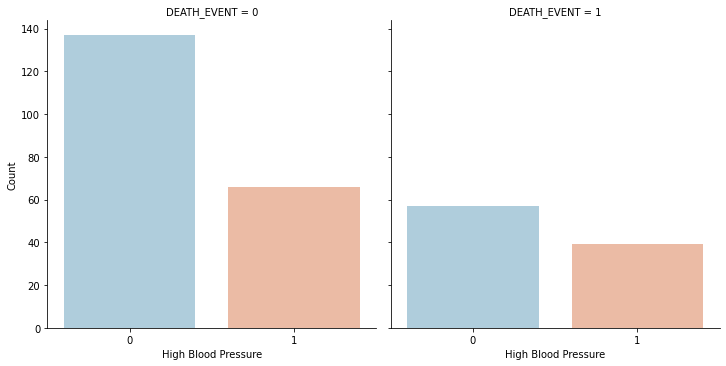

In [22]:
g = sns.catplot(x="high_blood_pressure", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("High Blood Pressure", "Count")

#### Since there is high correlation percentage in dead patients that had high blood pressure, the most poeple with low blood pressure are not dead.

## Platelets vs Death

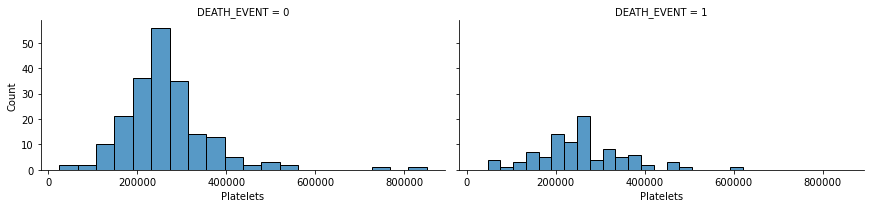

In [23]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'platelets', bins = 20)
g.set_axis_labels("Platelets", "Count")

#### From the dataset, the number of platelets is at the peak around 20000 to 400000. Some poeple had much higher number of platelets b ut that doesn't really determine the death event.

## Serum Creatinine vs Death

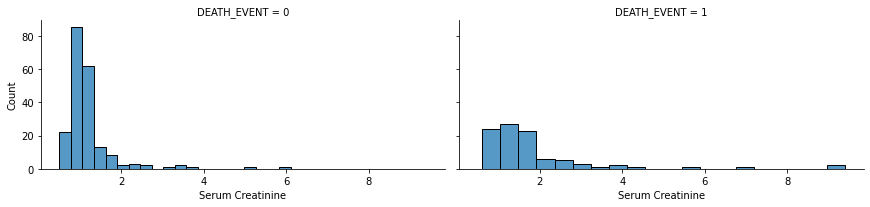

In [24]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'serum_creatinine', bins = 20)
g.set_axis_labels("Serum Creatinine", "Count")

#### The people with higher number of serum creatinine tentatively have less number of deaths than those with the lower number of serum creatinine

## Serum Sodium vs Death

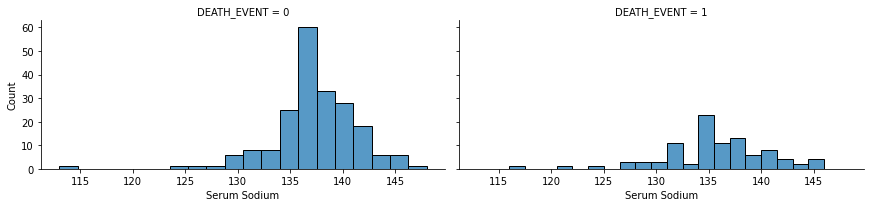

In [25]:
g = sns.FacetGrid(df, col = "DEATH_EVENT", aspect = 2)
g.map(sns.histplot, 'serum_sodium', bins = 20)
g.set_axis_labels("Serum Sodium", "Count")

#### The level of Serum Sodium doesn't really have much effect on the death event. Our sample has the data with serum sodum level mostly close to the range 135-140. The average is 136.63

## Sex vs Death

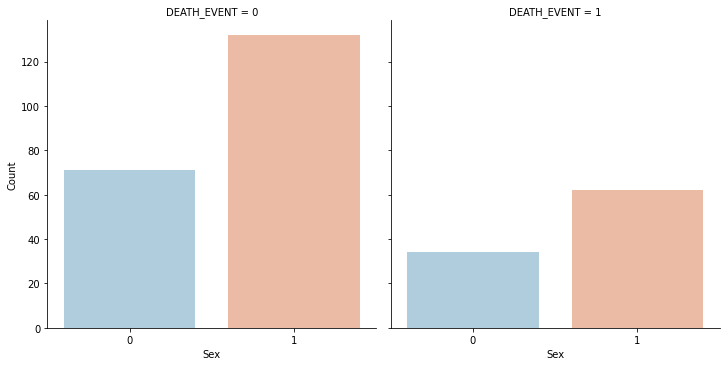

In [26]:
g = sns.catplot(x="sex", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Sex", "Count")

#### The number of males in the dataset is higher than the females, however percentage wise, females have a higher death rate

## Smoking vs Death

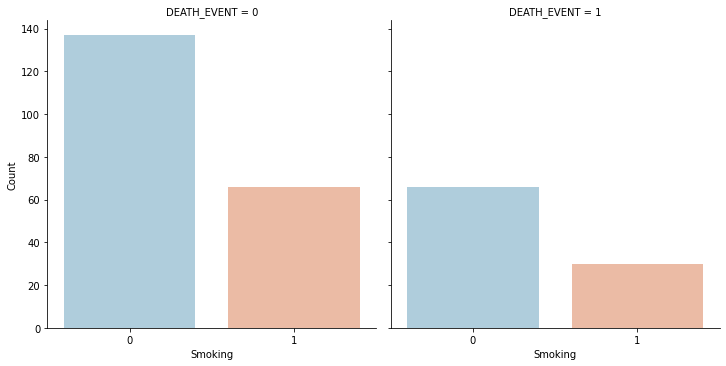

In [27]:
g = sns.catplot(x="smoking", kind="count", palette="RdBu_r", data=df, col="DEATH_EVENT")
g.set_axis_labels("Smoking", "Count")

#### Although it seems odd, the poeple who don't smoke have a slightly higher death rate those who smoke.